In [1]:
import pandas as pd

df=pd.read_csv(r"C:\Users\mati_\Desktop\Diplomatura_en_ciencia_de_datos\Archivos_de_datos\casos_covid_confirmados_santafe.csv")
df.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_departamento_nombre,fecha_apertura,cuidado_intensivo,fallecido,fecha_fallecimiento,clasificacion
0,10000072,F,38.0,Años,San Lorenzo,2021-04-08,NO,NO,NaN,Caso confirmado por laboratorio - No activo (p...
1,10000269,F,35.0,Años,Rosario,2021-04-08,NO,NO,NaN,Caso confirmado por laboratorio - No activo (p...
2,10000345,M,23.0,Años,General López,2021-04-08,NO,NO,NaN,Caso confirmado por laboratorio - No activo (p...
3,10000379,M,35.0,Años,San Lorenzo,2021-04-08,NO,NO,NaN,Caso confirmado por laboratorio - No activo (p...
4,10000793,F,34.0,Años,Rosario,2021-04-08,NO,NO,NaN,Caso confirmado por laboratorio - No Activo po...


In [2]:
#Exploramos el df

print("Este dataframe contiene ", len(df), "filas y ", len(df.columns), "columnas")

Este dataframe contiene  738172 filas y  10 columnas


In [3]:
#Mostramos que valores puede tener la columna "clasificacion"

print("La columna clasificacion puede tner los siguientes valores:\n", df["clasificacion"].unique())

La columna clasificacion puede tner los siguientes valores:
 ['Caso confirmado por laboratorio - No activo (por tiempo de evolución)'
 'Caso confirmado por laboratorio - No Activo por criterio de laboratorio'
 'Caso confirmado por laboratorio - Fallecido'
 'Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)'
 'Caso confirmado por criterio clínico-epidemiologico - Fallecido'
 'Caso confirmado por criterio clínico - epidemiológico -  Activo internado'
 'Caso confirmado por laboratorio - Activo Internado'
 'Caso confirmado por criterio clinico-epidemiológico - Activo'
 'Caso confirmado por laboratorio - Activo']


In [4]:
#Vemos cuanta gente de Santa Fe fallecio por covid. y cual es el porcentaje de mortandad.
fallecidos=df.fallecido.value_counts()
print(fallecidos)

porcentaje=len(df[df["fallecido"]=="SI"])/len(df)*100
print("El porcentaje de fallecidos es: \n", round(porcentaje,2))

fallecido
NO    728782
SI      9390
Name: count, dtype: int64
El porcentaje de fallecidos es: 
 1.27


In [5]:
# Otra forma, utilizando el dataframe "fallecidos"
100*fallecidos.loc["SI"]/(fallecidos.loc["NO"]+fallecidos.loc["SI"])

1.2720612540166791

In [27]:
# 3)Calcule cuántos casos y muertes hubo en cada departamento de la provincia de Santa Fe.
df_departamento=df.groupby("residencia_departamento_nombre")["fallecido"] #agrupo por departamento y me quedo con la columna "fallecido"
df_departamento.value_counts() #muestro el conteo de valores de fallecidos

residencia_departamento_nombre  fallecido
9 de Julio                      NO             5837
                                SI               94
Belgrano                        NO             7302
                                SI               54
Caseros                         NO            16420
                                SI              261
Castellanos                     NO            42193
                                SI              539
Constitución                    NO            18442
                                SI              199
Garay                           NO             3182
                                SI               34
General López                   NO            36791
                                SI              563
General Obligado                NO            24728
                                SI              384
Iriondo                         NO            12069
                                SI               62
La Capital            

array([[<Axes: title={'center': 'edad'}>]], dtype=object)

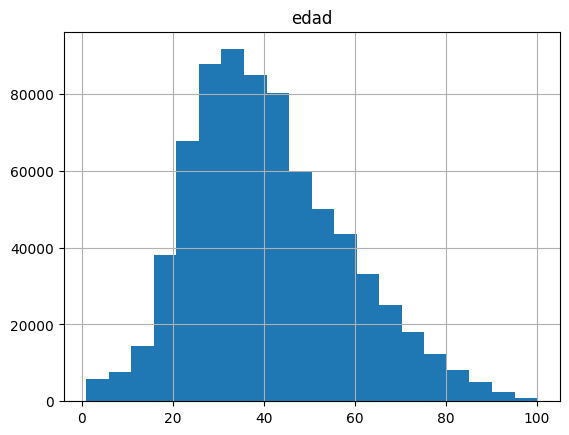

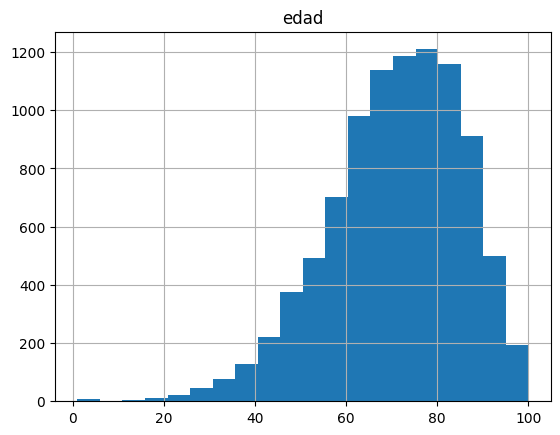

In [29]:
# d)
# todos los confirmados
df[(df.edad_años_meses=='Años') & (df.edad<101)].hist(column="edad", bins=20)

# solo fallecidos
df[(df.edad_años_meses=='Años') & (df.edad<101) & (df.fallecido=='SI')].hist(column="edad", bins=20)

fecha_apertura
2022-01-12    11791
2022-01-11    11165
2022-01-13    11086
2022-01-18    10046
2022-01-19     9883
              ...  
2020-04-28        1
2020-04-29        1
2020-05-01        1
2020-05-11        1
2020-06-13        1
Name: count, Length: 770, dtype: int64


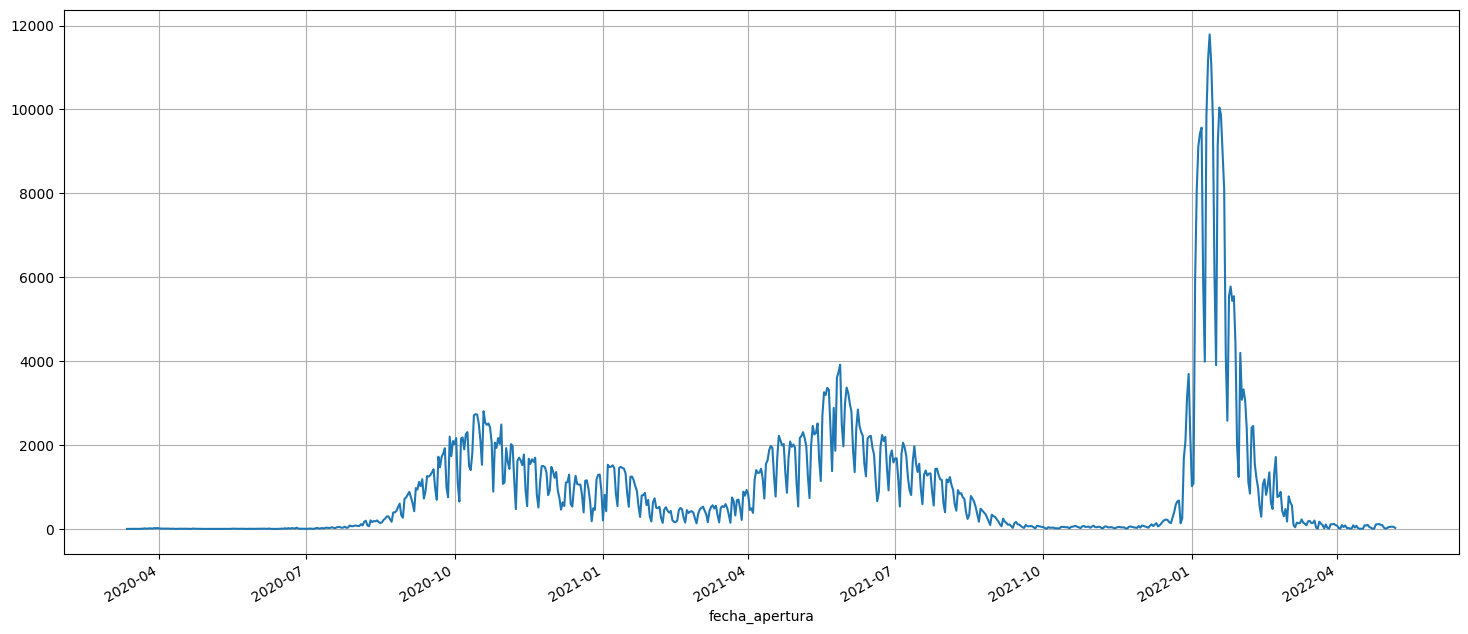

In [42]:
# 5) gráfico de casos diarios de covid
df['fecha_apertura'] = pd.to_datetime(df['fecha_apertura'], format= '%Y-%m-%d')
df_covid_fechas = df['fecha_apertura'].value_counts().sort_index()
#df.plot.hist(columns="fecha_apertura")
df_covid_fechas.plot.line(figsize=(18,8), grid=True)
print(df_covid_fechas)